# Para o grupo

Pessoal, fiz várias mudanças nos arquivos que estavam no git e gerei esse aqui. 

Ainda não mexi na função que o Alaor fez para tratar as subsidiárias e nem no arquivo do André.

Tirei algumas funções que faziam comandos simples como abertura do Excel e leitura de uma coluna do dataframe. Acho que neste esquema de notebook fica mais fácil de entender quando estamos visualizando explicitamente o código.

Como estou usando no Colab (que apaga os arquivos utilizados - ex.: csv, png), fiz uma rotina para buscar os dados diretamente do git.

As wordclouds de estado e empresa, estou gerando somente baseada em frequencia. Não vejo necessidade de um textmining mais avançado para estes casos, a não ser a limpeza dos dados de empresa.

A limpeza dos dados de empresa, estou fazendo linha a linha, removendo stopwords e limpando os dados.

Temos que tratar os casos de mesma empresa aparecer mais de uma vez. Exemplos:
- `BANCO BRADESCO CARTOES`
- `BANCO BRADESCO CARTÔES`
- `BANCO BRADESCO CARTÕES`

# Descrição

**Trabalho BI - NLP WordClouds - Tratamento de Base de Reclamações**

Professor: Leonardo Alfredo Forero Mendoza

Alunos: 

- Alaor de Carvalho Neto
- André Luis Maravilha
- Daniel Fidelis Marques
- Leonardo Cardoso Vicente
- Maicon Melo Alves

A base do trabalho são todas as reclamações fundamentadas que foram audiência no ano de 2017.

1- Por favor crie uma wordcloud para item:
- empresa
- estado
- serviço

2- Na coluna 'problema' retire os dados null

Sendo assim ao todo são 3 wordclouds para serem entregues em um arquivo word.

Códigos de referência da aula 8 e 9.


# Importação de Bibliotecas e definições iniciais

In [1]:
# Imports
from wordcloud import WordCloud
from PIL import Image
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import matplotlib.pyplot as plt
import requests

# Downloads NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Referências para os arquivos
URL_CSV_FILE = "https://github.com/danielfidelis/BIWORDCLOUD/raw/master/codigo/base%20reclama%C3%A7%C3%B5es.csv"
URL_TEMPLATE_IMG = "https://github.com/danielfidelis/BIWORDCLOUD/raw/master/codigo/cloud.png"
CLOUD_FILE = URL_TEMPLATE_IMG.split("/")[-1]

# Identificação de valores nulos
NULL_VALUE = "#NULL#"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Minhas stopwords
MINHAS_STOP_WORDS = [
    'solicita',
    'deseja',
    'bom',
    'dia',
    'etc',
    's',
    'a',
    's/a',
    'ltda',
    'matriz',
    'sa'
]

In [3]:
# Realiza o download e salva na pasta DIR_FILES
file = requests.get(URL_TEMPLATE_IMG, stream=True)
dump = file.content
with open(CLOUD_FILE,'wb') as f:
  f.write(dump)
del dump


# Funções internas

## Função para downlad da imagem template


In [4]:
def download_cloud_img():
  if not os.path.isfile(CLOUD_FILE):
    # Realiza o download
    file = requests.get(URL_TEMPLATE_IMG, stream=True)
    dump = file.content
    with open(CLOUD_FILE,'wb') as f:
      f.write(dump)
    del dump


## Função para gerar wordcloud

In [5]:
def gerar_nuvem(obj):
  """
  Gera a nuvem baseada no tipo recebido
  texto ou dicionário de frequências
  """
  maskArray = np.array(Image.open(CLOUD_FILE))
  wordcloud = WordCloud(collocations=False, background_color = "white", max_words = 300, mask = maskArray)
  #wordcloud = WordCloud(regexp="\w[\w_]+", collocations=False, width=800, height=600, max_words=20)
  if type(obj) == dict:
    wordcloud.generate_from_frequencies(obj)
  else: # Tipo = texto
    wordcloud.generate(obj)
  
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

## Função para identificação de palavras válidas
Executa as segintes tarefas:
- Eliminação de stop words de palavras em português;
- Seleção somente de strings alfanúmericas;
- Eliminação de palavras de minha lista de stop words.


In [6]:
def palavra_valida(palavra, minha_stopwords):
  if palavra not in nltk.corpus.stopwords.words('portuguese') and palavra.isalpha() and palavra not in minha_stopwords:
      return True

  return False

# Análise descritiva dos dados

In [7]:
# Importa os dados
download_cloud_img()
df = pd.read_csv(URL_CSV_FILE, encoding="windows-1252", sep=";")

In [8]:
# Verificando os dados
df.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


## Coluna **estado**

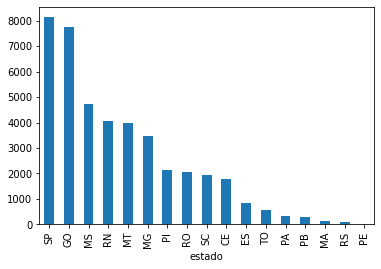

In [9]:
df.groupby(['estado'])['estado'].count().sort_values(ascending=False).plot(kind='bar')
plt.show()

## Coluna **empresa**

In [10]:
# Verificando a quantidade e descrição dos dados
df['empresa'].describe()

count                     42306
unique                    11214
top       TELEFONICA BRASIL S/A
freq                        846
Name: empresa, dtype: object

In [11]:
# Verificando o tamanho das strings existentes em empresa
df['empresa'].str.len().describe()

count    42306.000000
mean        28.495745
std         12.561178
min          2.000000
25%         19.000000
50%         27.000000
75%         38.000000
max        100.000000
Name: empresa, dtype: float64

## Coluna **serviço**

In [12]:
# Verificando a quantidade e descrição dos dados
df['serviço'].describe()

count                                                 42307
unique                                                  193
top       Telefone ( Convencional, Celular, Interfone, E...
freq                                                   5149
Name: serviço, dtype: object

In [13]:
# Verificando o tamanho das strings existentes
df['serviço'].str.len().describe()

count    42307.000000
mean        34.798379
std         23.967485
min          4.000000
25%         16.000000
50%         23.000000
75%         51.000000
max        160.000000
Name: serviço, dtype: float64

## Coluna **problema**

In [14]:
# Verificando a quantidade e descrição dos dados
df['problema'].describe()

count                 33371
unique                  167
top       Produto com vício
freq                   6043
Name: problema, dtype: object

# Geração de wordclouds

## Estado

No caso da wordcloud de estados, o processamento está sendo feito levando em consideração a frequência normalizada em que cada estado aparece na respectiva coluna do dataframe.

Não são realizados os processos de tokenização e remoção de stopwords.

Obs.: não vi diferença visual gerando os dados normalizados ou não. De qualquer forma, por garantia mantive o código `.transform(lambda x: (x - x.mean()) / x.std())`para normalizar.

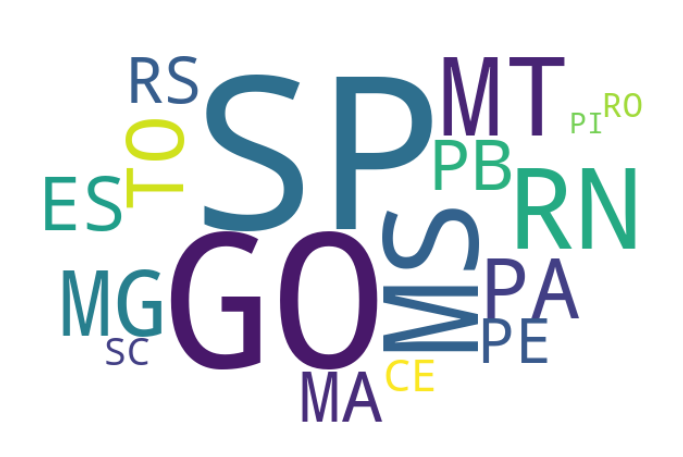

In [15]:
# Gera um dicionário com a frequencia normalizada de cada estado
df_group = df.loc[df['estado']!=NULL_VALUE].groupby(['estado'])['estado'].count()
df_group = df_group.transform(lambda x: (x - x.mean()) / x.std())
dic_estado = df_group.to_dict()

# Gera a nuvem
gerar_nuvem(dic_estado)

## Empresa

In [16]:
# Identifica valores faltantes para evitar erro no tratamento
df['empresa'].fillna(NULL_VALUE, inplace=True)

### Wordcloud baseada em frequência sem nenhum tratamento nos dados

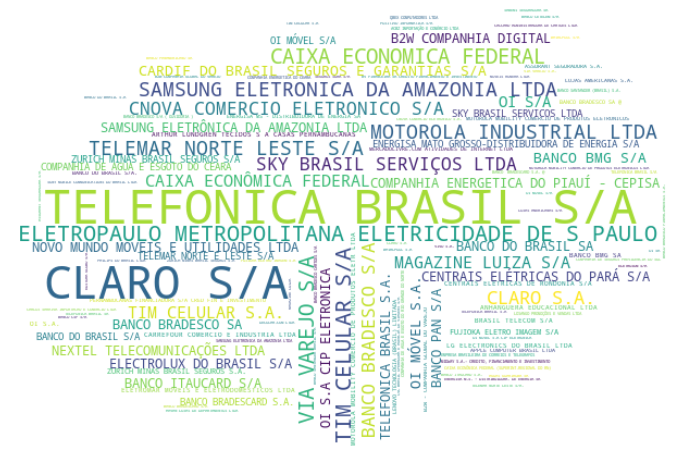

In [17]:
# Gera um dicionário com a frequencia normalizada
df_group = df.loc[df['empresa']!=NULL_VALUE].groupby(['empresa'])['empresa'].count()
df_group = df_group.transform(lambda x: (x - x.mean()) / x.std())
dic_empresa = df_group.to_dict()

# Gera a nuvem
gerar_nuvem(dic_empresa)

### Wordcloud removendo stopwords

Executa o processo de tokenização e remoção de stopwords em cada linha da coluna `empresa`

In [ ]:
# Remove stopwords em cada linha do dataframe e coloca o resultado na coluna
# empresa_clean da respectiva linha
for idx in df.index:
  # Verifica a empresa
  empresa = df.loc[idx, 'empresa']

  # Tokeniza
  tokens = nltk.word_tokenize(empresa, language='portuguese')

  # Remove stopwords da lista tokenizada
  tokens = [p for p in tokens if palavra_valida(p.lower(), MINHAS_STOP_WORDS)]
  
  # Transforma em texto e grava na coluna empresa_clean
  df.loc[idx, 'empresa_clean'] = " ".join(tokens)

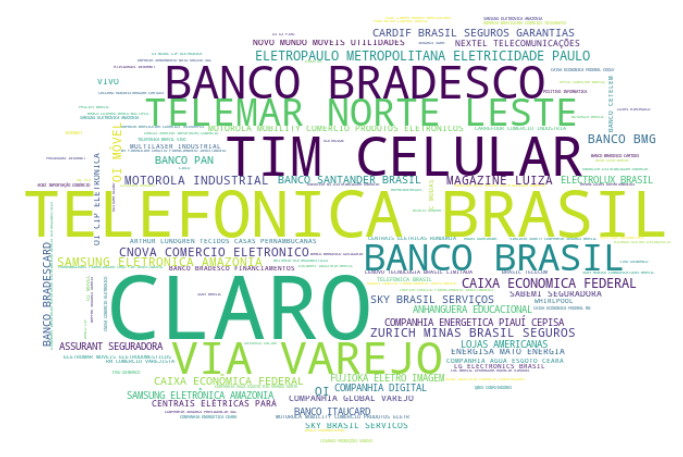

In [19]:
# Gera um dicionário com a frequencia normalizada
df_group = df.loc[df['empresa']!=NULL_VALUE].groupby(['empresa_clean'])['empresa_clean'].count()
df_group = df_group.transform(lambda x: (x - x.mean()) / x.std())
dic_empresa = df_group.to_dict()

# Gera a nuvem
gerar_nuvem(dic_empresa)